In [1]:
#imports
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
import h5py
import pprint as pp
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 1.3 Demographics

- Dataset Name: 2012 San Diego Demographics - County Population
- Data Source: Live Well San Diego
- Number of observations: 3,143,429 for San Diego
- Link: https://data.livewellsd.org/Demographic-Profiles/2012-San-Diego-Demographics-County-Population/byka-f6k4/data


This dataset contains region, area (city), total 2012 population, populations for age group, genders, and races/ethnicities.

This data set will be cleaned and used to cross reference both housing prices and income for the city of San Diego


**1.3.1 Cleaning Data:**

For demographics data, we have cleaned and created a two-dimensional matrix where the former index refers to the corresponding city, and latter index refers to the demographic count

In [2]:
#load data from h5 
h5_file = '../COGS108-Gentrification/cogs108.h5'
#reading data
with h5py.File(h5_file, 'r') as h5:
    dset = h5['county_demographics']
    dem = dset[:][:]

**1.2.2 Analysis of Demographics:**

We conducted the analysis through each visualization.

To visualize the data, we plotted the demographic counts in each region with bar graphs showing the differences between the races/ethnicities

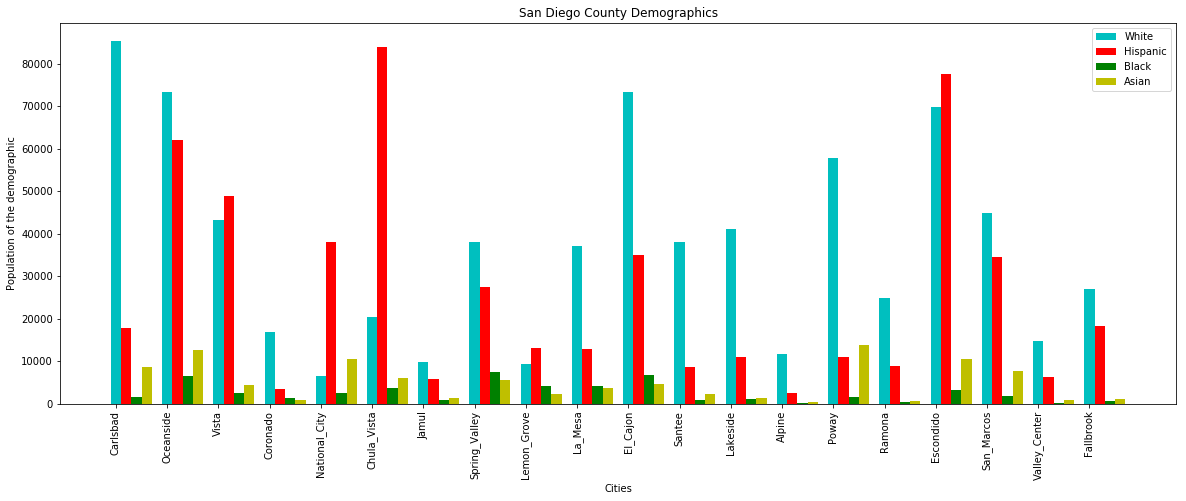

In [3]:
N = 20
ind = np.arange(N)
fig = plt.figure(1,figsize=(20,7))
ax = fig.add_subplot(111)
width = .20


ax.bar(ind+width*1, [item[0] for item in dem], width, color='c')
ax.bar(ind+width*2, [item[1] for item in dem], width, color='r')
ax.bar(ind+width*3, [item[2] for item in dem], width, color='g')
ax.bar(ind+width*4, [item[3] for item in dem], width, color='y')

ax.set_title('San Diego County Demographics')
ax.legend( ("White", "Hispanic", "Black", "Asian"))
ax.set_ylabel('Population of the demographic')
ax.set_xlabel('Cities')
ax.set_xticklabels(('Carlsbad', 'Oceanside', 'Vista', 'Coronado', 'National_City', 'Chula_Vista', 'Jamul', 'Spring_Valley', 'Lemon_Grove', 'La_Mesa', 'El_Cajon', 'Santee', 'Lakeside', 'Alpine', 'Poway', 'Ramona', 'Escondido', 'San_Marcos', 'Valley_Center', 'Fallbrook'), rotation='vertical')
ax.set_xticks(ind+width)

plt.show()

Overall this data indicates that the majority in most cities throughout San Diego County are white people. As a result, we could assume that these areas can't be gentrified. <br> <br> <br>

To get a closer look, we visualize the differences in demographics by dot plotting.



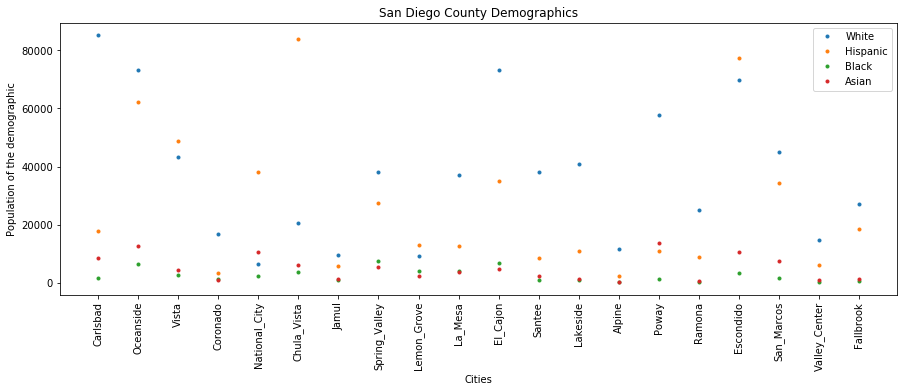

In [4]:

plt.figure(1,figsize=(15,5))
plt.xlabel('Cities')
plt.ylabel('Population of the demographic')
plt.title('San Diego County Demographics')
plt.xticks(range(20), ['Carlsbad', 'Oceanside', 'Vista', 'Coronado', 'National_City', 'Chula_Vista', 'Jamul', 'Spring_Valley', 'Lemon_Grove', 'La_Mesa', 'El_Cajon', 'Santee', 'Lakeside', 'Alpine', 'Poway', 'Ramona', 'Escondido', 'San_Marcos', 'Valley_Center', 'Fallbrook'], rotation='vertical')
_ = plt.plot(dem[:][:],'.')
_ = plt.legend(['White', 'Hispanic', 'Black', 'Asian'], loc="upper right")



Overall this data shows that there is a big gap between the populations of the different races/ethnicities. With White and Hispanic being separaated from Black and Asian.

<br> <br> <br> <br>

### 1.5 Crime Data: San Diego County excluding city
- Dataset Name: 2012 San Diego Demographics - County Population
- Data Source: San Diego Regional Data Library
- Number of observations: 750,000 for San Diego
- Link: http://data.sandiegodata.org/dataset/clarinova_com-crime-incidents-casnd-7ba4-extract/resource/34e63e92-7172-4a7e-863b-3479dc2a0b1e


All of the incidents, about 750K records, for years 2008, 2009, 2010, 2011 and 2012. This set has less than 1M records so it can be loaded into Tableau.

This data set will be cleaned and compared to "1.4 Crime Data: San Diego City" to find the differences between the two data sets


**1.5.1 Cleaning Data:**

For the San Diego crime data, we have cleaned and created a two-dimension matrix where the former index refers to the corresponding city (excluding the city of San Diego), and the latter index refers to the crime count.


In [5]:
#load data from h5 
h5_file = '../COGS108-Gentrification/cogs108.h5'
#reading data
with h5py.File(h5_file, 'r') as h5:
    dset = h5['county_crime_avg_5y']
    sdcec = dset[:][:]

with h5py.File(h5_file, 'r') as h5:
    dset = h5['county_crime_avg_5y_rates']
    
    sdcecr = dset[:][:]

**1.5.2 Analysis of Housing Prices:**


We conducted the analysis through each visualization. 

**1.5.2.1 Trends between San Diego City and San Diego County:** The gradual decrease in crime apprears to be a general trend for most of the neighborhoods in San Diego city. However, when graphing the crime for the entire county of San Diego, there are significantly more fluctations in crime counts.


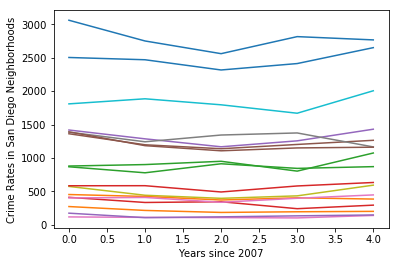

In [6]:
plt.xlabel('Years since 2007')
plt.ylabel('Crime Rates in San Diego Neighborhoods')
_ = plt.plot(sdcecr[:][:])

The graph below shows the number of crime counts in San Diego County (excluding the city of San Diego) for each zipcode where each color represents a different year. The crime counts for each year remain relatively similar.

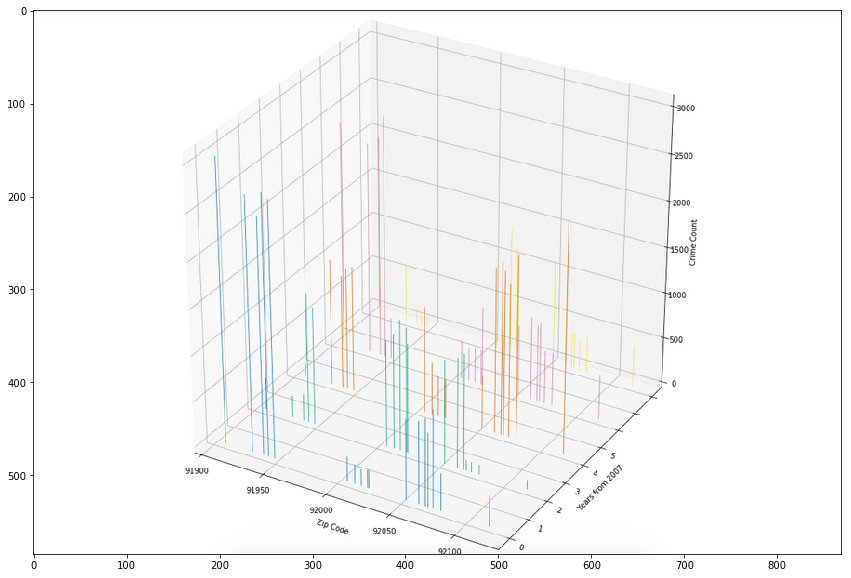

In [7]:
# 3D Graph Goes here
import matplotlib.image as mpimg
img = mpimg.imread('../county3d.png')
fig = plt.figure(figsize = (30,10)) 
ax3 = fig.add_subplot(111)
ax3.imshow(img, interpolation='none')
plt.show()

<br> <br> <br> <br> <br>

### 1.6 FBI Crime Rates
- Dataset Name: Table 8
- Data Source: FBI
- Number of observations: a lot
- Link: https://ucr.fbi.gov/crime-in-the-u.s/






**1.6.1 Cleaning Data:**

In [8]:
h5_file = '../COGS108-Gentrification/cogs108.h5'
#reading data
with h5py.File(h5_file, 'r') as h5:
    dset = h5['fbi_crime_rates']
    fbicr = dset[:][:]

**1.6.2 Analysis of Housing Prices:**

We conducted the analysis through each visualization.

**1.6.2.1 Crime Rates in San Diego County According to FBI Data:** Crime gradually decreased in most of the cities in San Diego County. While one city had fluctations in crime rates. This increase in crime occurred in Del Mar.


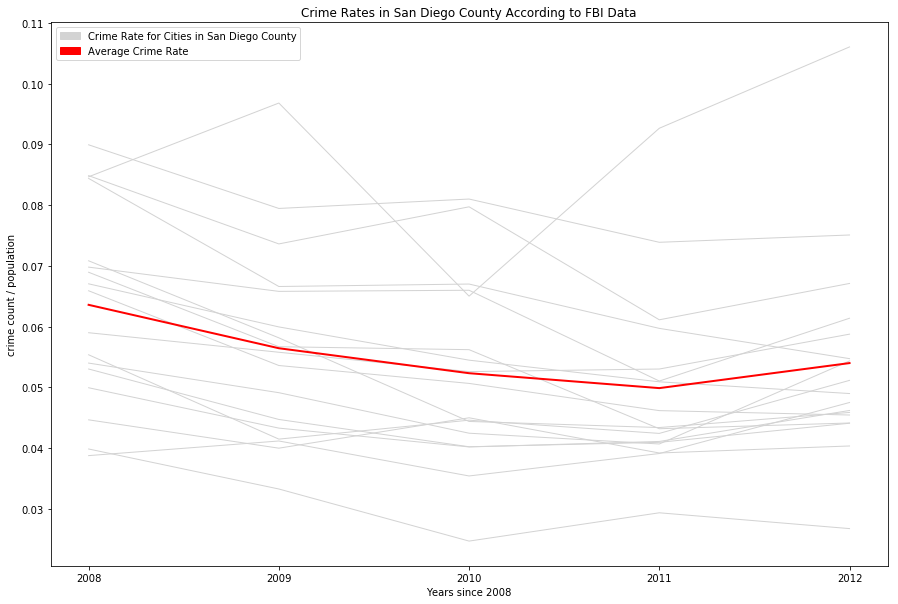

In [63]:
import matplotlib.patches as mpatches
plt.figure(1,figsize=(15,10))
plt.title("Crime Rates in San Diego County According to FBI Data")
plt.xlabel('Years since 2008')
plt.ylabel('crime count / population')

lines = plt.plot(fbicr[:][:])
plt.setp(lines, color='lightgrey', linewidth=1.0)

plt.xticks(range(20), ['2008', '2009', '2010', '2011', '2012'])
avgline = plt.plot([fbicr[0][:].sum()/17, fbicr[1][:].sum()/17, fbicr[2][:].sum()/17, fbicr[3][:].sum()/17,fbicr[4][:].sum()/17])
plt.setp(avgline, color="red", linewidth=2.0)
grey_patch = mpatches.Patch(color='lightgrey', label='Crime Rate for Cities in San Diego County')
red_patch = mpatches.Patch(color='red', label='Average Crime Rate')
_ = plt.legend(handles=[grey_patch,red_patch])


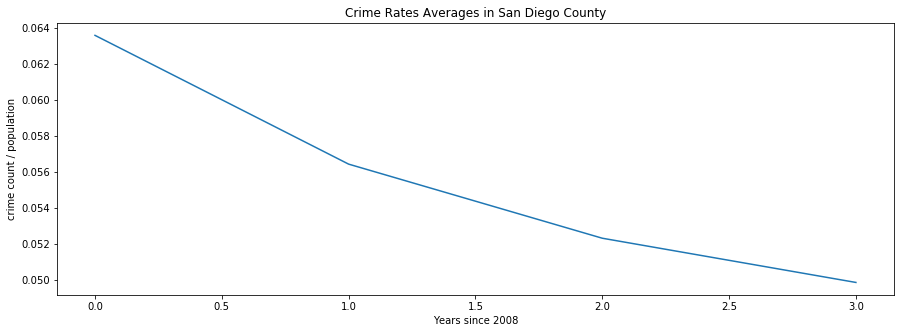

In [9]:
plt.figure(1,figsize=(15,5))
plt.title("Crime Rates Averages in San Diego County")
plt.xlabel('Years since 2008')
plt.ylabel('crime count / population')
_ = plt.plot([fbicr[0][:].sum()/17, fbicr[1][:].sum()/17, fbicr[2][:].sum()/17, fbicr[3][:].sum()/17])

In [ ]:
N = 4
ind = np.arange(N)
fig = plt.figure(1,figsize=(20,8))
ax = fig.add_subplot(111)
width = .20


ax.bar(ind+width*1, [item[0] for item in dem], width, color='c')
ax.bar(ind+width*2, [item[1] for item in dem], width, color='r')
ax.bar(ind+width*3, [item[2] for item in dem], width, color='g')
ax.bar(ind+width*4, [item[3] for item in dem], width, color='y')

ax.set_title('San Diego County Demographics')
ax.legend( ("White", "Hispanic", "Black", "Asian"))
ax.set_ylabel('Population of the demographic')
ax.set_xlabel('Cities')
ax.set_xticklabels(('Carlsbad', 'Oceanside', 'Vista', 'Coronado', 'National_City', 'Chula_Vista', 'Jamul', 'Spring_Valley', 'Lemon_Grove', 'La_Mesa', 'El_Cajon', 'Santee', 'Lakeside', 'Alpine', 'Poway', 'Ramona', 'Escondido', 'San_Marcos', 'Valley_Center', 'Fallbrook'), rotation='vertical')
ax.set_xticks(ind+width)

plt.show()